<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/EVA4/blob/master/S12/Task2/EVA4_S12_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries 

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
!git clone https://github.com/GadirajuSanjayvarma/EVA4.git
import sys
import torch

Cloning into 'EVA4'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 446 (delta 0), reused 0 (delta 0), pack-reused 441
Receiving objects: 100% (446/446), 9.81 MiB | 4.51 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [0]:
sys.path.append("/content/EVA4/S12/Task2/")

In [4]:
cd /content/EVA4/S12/Task2/

/content/EVA4/S12/Task2


In [5]:
ls

dogs_csv.json  Images/


In [0]:
import json 
  
# Opening JSON file 
f = open('dogs_csv.json',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  

renaming keys in json to make the keys easy to access in loops

In [0]:
annotations=dict()
i=1
for item in data:
  annotations[i]=data[item]
  i+=1

We need to store points in the numpy array so we initialized the numpy array with size length of annotations.For length in images we will store width and height for nested annotations also

In [0]:
import numpy as np
import cv2
k=0
x = np.empty([53,2]) 
for i in range(50):
  #print(i)
  img=cv2.imread("/content/EVA4/S12/Task2/Images/download{}.jpg".format(i+1))
  a=img.shape
  x[k][0]=(annotations[i+1]['regions'][0]['shape_attributes']['width']/(float)(a[1]))
  x[k][1]=(annotations[i+1]['regions'][0]['shape_attributes']['height']/(float)(a[0]))
  k+=1
  #the try will check whether there are any nested annotations in an image
  #if there are nested annotations then it will add them to numpy array
  try:
      x[k][0]=(annotations[i+1]['regions'][1]['shape_attributes']['width']/(float)(a[1]))
      x[k][1]=(annotations[i+1]['regions'][1]['shape_attributes']['height']/(float)(a[0]))
      k+=1
  except:
      pass

In [0]:
print(x.shape)

(53, 2)


Plotting width and height of annotations for visualization process

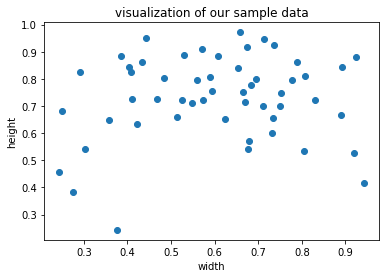

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])
plt.xlabel('width')
plt.ylabel('height')
plt.title('visualization of our sample data')
plt.show()

USING ELBOW METHOD TO FIND BEST NO OF CLUSTERS FOR K MEANS

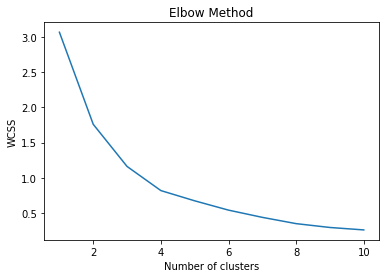

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

FROM ABOVE BEST CLUSTERS ARE 4 SO WE ARE USING 4 FOR NO OF CLUSTERS IN KMEANS

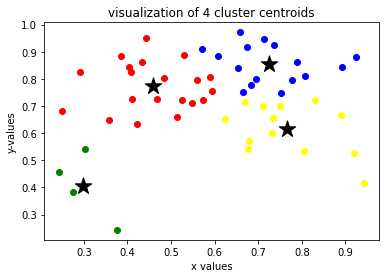

In [15]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
colors=['red', 'yellow', 'green', 'blue', 'orange']
pred_y = kmeans.fit_predict(x)
for i in range(len(pred_y)):
    plt.scatter(x[i,0],x[i,1],c=colors[pred_y[i]])
    plt.title('visualization of 4 cluster centroids')
    plt.xlabel('x values')
    plt.ylabel('y-values')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black',marker='*')
plt.show()
